## Multivariate distributions

Multivariate distributions describe the relationships and joint behavior among two or more random variables, extending the concepts of univariate distributions to higher dimensions. This is essential for modeling complex real-world phenomena where variables interact, such as height and weight in biological studies or multiple financial returns in economics.

A **multivariate random variable** is essentially a vector where each element represents a different random variable, and together they form a single observation or sample. For example, recording a penguin’s beak length and beak depth at once gives a bivariate—i.e., two-dimensional—random variable, and collectively observing hundreds of penguins yields a multivariate dataset.

- Each random variable has its own mean and variance.
- The joint probability distribution encodes how all variables behave together.
- When variables are independent, the joint distribution is just the product of their individual distributions. Most real-world data show dependencies, requiring proper multivariate distributions.

### Key Properties

##### Marginal and conditional distributions

Marginal and conditional distributions are ways to describe how individual variables behave within a multivariate (joint) probability distribution. They are essential for analyzing complex datasets with multiple variables.

- A **marginal distribution** gives the probability distribution of one variable, ignoring the others in the joint distribution. It answers: “If only one variable is of interest, what’s its probability pattern?”

- For discrete variables with joint probability \(P(X = x, Y = y)\), the marginal distribution for \(X\). This means summing the joint probabilities over all possible values of \(Y\). 

$$
P(X = x) = \sum_y P(X = x, Y = y)
$$
 

- For continuous variables with joint density \(f(x, y)\). Integrate over all values of Y to get the marginal density for X.

$$
f_X(x) = \int_{-\infty}^{\infty} f(x, y) \, dy
$$

- Marginal distributions help summarize the overall distribution of a single variable, making complex joint data more interpretable.

- A **conditional distribution** describes the probability of one variable, given that another variable has a specific value. It answers: “What is the distribution of X if Y is already known to be y?”

- For discrete variables:

$$
P(X = x \mid Y = y) = \frac{P(X = x, Y = y)}{P(Y = y)}
$$

- For continuous variables, where \(f_Y(y)\) is the marginal density of \(Y\).

$$
f_{X \mid Y}(x \mid y) = \frac{f(x, y)}{f_Y(y)}
$$
  

- Conditional distributions reveal dependencies between variables and are crucial for predictive modeling, interpretation, and statistical inference.

**Independence of Random Variables**

- Two random variables \(X\) and \(Y\) are independent if knowing one does not affect the other.  

- Conditional distributions equal the marginal distribution for all values:

$$
p_{Y|X=x} = p_Y \quad \text{for all } x
$$

- Independence means the joint distribution factorizes into marginal distributions:

$$
p_{XY} = p_X \, p_Y
$$

##### Mean vector, covariance, and correlation 

The mean vector, covariance, and correlation are foundational concepts for understanding multivariate data.

**Mean Vector**  

The mean vector gives the average value for each variable in the dataset.

If you have several variables (say, height, weight, and age), the mean vector just lists each variable’s mean.

In [14]:
import numpy as np

# Each row is a sample, columns: height, weight, age
X = np.array([
    [160, 60, 30],
    [170, 70, 25],
    [180, 80, 40]
])

mean_vector = np.mean(X, axis=0)
print(mean_vector)
# Output: [170. 70. 31.7]

# Each entry is the mean of that column: 170 cm for height, 70 kg for weight, 31.7 years for age.

[170.          70.          31.66666667]


**Covariance** 

Covariance measures how two variables change together.

- The covariance matrix (often written as Σ) generalizes variance.  
  - Diagonal entries are variances.  
  - Off-diagonal entries are covariances, reflecting pairwise dependencies.  

$$
\text{Cov}(X, Y) =\sigma_{XY} = E \big[ (X - \mu_X)(Y - \mu_Y) \big]
$$

- A positive covariance: when one increases, the other tends to increase.
- A negative covariance: when one increases, the other tends to decrease.
- Zero covariance: no linear relationship.  
- The covariance matrix is symmetric. 

In [23]:
# Covariance Formula in Python:
np.cov(X, rowvar=False)

# The diagonal elements show the variance of each variable.
# Off-diagonal elements show the covariance between pairs.

array([[100.        , 100.        ,  50.        ],
       [100.        , 100.        ,  50.        ],
       [ 50.        ,  50.        ,  58.33333333]])

In [16]:
# Covariance of height and weight
height = X[:,0]
weight = X[:,1]
cov_hw = np.cov(height, weight)[0,1]
print(cov_hw)

# This shows how height and weight “move” together in the dataset.

100.0


**Correlation**  

Correlation standardizes covariance to a range from -1 to 1.

- Correlation normalizes covariance by dividing by the standard deviations of both variables, giving a value between -1 and 1.  
- This makes it more interpretable. 

$$
\rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \, \sigma_Y}
$$

$$
\rho(X, Y) = \frac{\sigma_{XY}}{(\sigma_{X} \sigma_{Y})}
$$


    - **ρ = 1:** perfect positive linear relationship  
    - **ρ = 0:** no linear relationship  
    - **ρ = -1:** perfect negative linear relationship  


- A correlation matrix is a square table showing the correlation coefficients (ρ) between pairs of variables.  
- The diagonal entries are always 1 because each variable is perfectly correlated with itself.  
- $ρ_ij$ is obtained by dividing the covariance between variables $X_i$ and $X_j$ by the product of their standard deviations.  
- Correlation captures only linear tendencies.  
- Variables can be uncorrelated but still predict each other (e.g., sine-wave dependencies).  


In [17]:
# Correlation Formula in Python:
corr_matrix = np.corrcoef(X, rowvar=False)
print(corr_matrix)

# corr_matrix[0,1] gives correlation between height and weight.
# Correlation is easier to interpret than covariance because of this -1 to 1 range.

[[1.         1.         0.65465367]
 [1.         1.         0.65465367]
 [0.65465367 0.65465367 1.        ]]


| Concept       | Python (NumPy/Pandas)                 | What it Shows                                |
|---------------|---------------------------------------|----------------------------------------------|
| Mean vector   | np.mean(X, axis=0) / df.mean()        | Average of each variable                     |
| Covariance    | np.cov(X, rowvar=False) / df.cov()    | Spread, and pair relationships between variables |
| Correlation   | np.corrcoef(X, rowvar=False) / df.corr() | Linear relationships, ranges -1 to 1        |


In [18]:
# Example using Pandas:

import pandas as pd

data = pd.DataFrame({"length": [47, 48], "depth": [15, 15.5]})
mean_vector = data.mean()
cov_matrix = data.cov()
corr_matrix = data.corr()


In [19]:
mean_vector

length    47.50
depth     15.25
dtype: float64

In [20]:
cov_matrix

,length,depth
length,0.50,0.250
depth,0.25,0.125


In [21]:
corr_matrix

,length,depth
length,1.0,1.0
depth,1.0,1.0


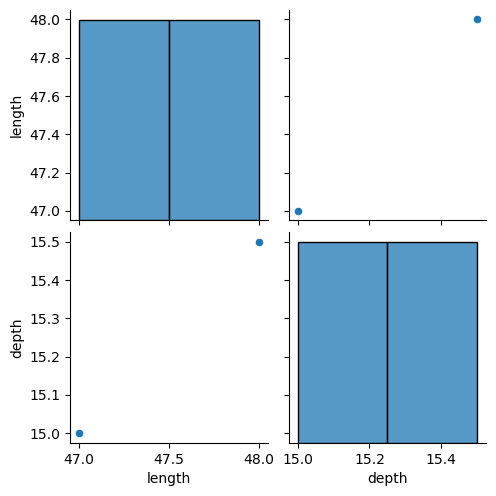

In [25]:
# Correlation matrix plot using Seaborn
import seaborn as sns
sns.pairplot(data)

<Axes: >

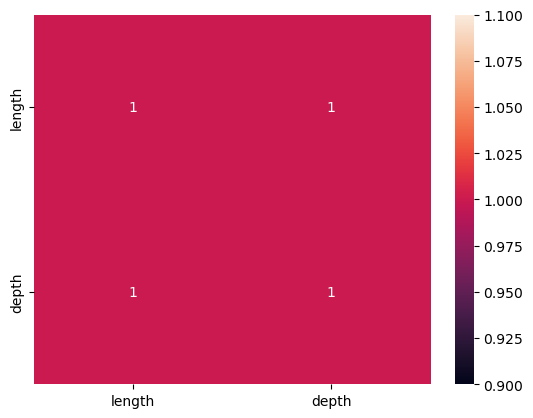

In [26]:
sns.heatmap(data.corr(), annot=True)

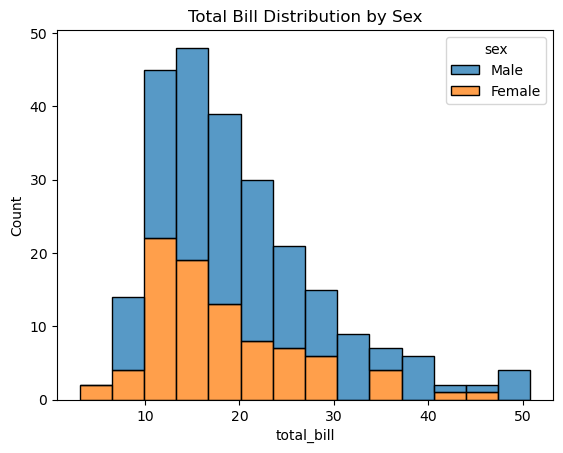

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
tips = sns.load_dataset("tips")  # built-in dataset in Seaborn

# Plot histogram with hue by 'sex' column
sns.histplot(data=tips, x="total_bill", hue="sex", multiple="stack")

plt.title("Total Bill Distribution by Sex")
plt.show()



**Popular Multivariate Distributions**

- Multivariate Normal Distribution: The most famous, fully described by its mean vector and covariance matrix. Marginal and conditional distributions are also normal; widely used in statistics and ML.

- Others: multivariate binomial, lognormal, multinomial (note: multinomial is for categories drawn multiple times, while multivariate means multiple random variables measured together).

In [ ]:
# Sources:
# [1](https://www.statsref.com/HTML/multivariate_distributions.html)
# [2](https://www.machinelearningmastery.com/machine-learning-in-python-step-by-step/)
# [3](https://www.sciencedirect.com/topics/mathematics/multivariate-distribution)
# [4](https://www.tnstate.edu/faculty/fyao/COMP3050/Py-tutorial.pdf)
# [5](https://otexts.com/weird/03-multivariate.html)
# [6](https://wiki.python.org/moin/BeginnersGuide)
# [7](https://www.statisticshowto.com/multivariate-distribution/)
# [8](https://docs.python.org/3/tutorial/index.html)
# [9](https://www.stat.uchicago.edu/~stigler/Stat244/ch3withfigs.pdf)
# [10](https://bugs.python.org/file47781/Tutorial_EDIT.pdf)
# [11](https://fiveable.me/probability-and-statistics/unit-5/marginal-distributions/study-guide/z9IDymP1ut2ECg7c)
# [12](https://library.fiveable.me/theoretical-statistics/unit-4/marginal-distributions/study-guide/J2lnFjo080wxNURz)
# [13](https://en.wikipedia.org/wiki/Marginal_distribution)
# [14](https://www.geeksforgeeks.org/maths/marginal-distribution/)
# [15](https://www.statlect.com/probability-distributions/multivariate-normal-distribution-partitioning)
# [16](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)
# [17](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/marginal-distribution/)
# [18](https://www.sciencedirect.com/topics/computer-science/marginal-distribution)
# [19](https://www.stat.uchicago.edu/~stigler/Stat244/ch3withfigs.pdf)
# [20](https://www.khanacademy.org/math/ap-statistics/analyzing-categorical-ap/distributions-two-way-tables/v/marginal-distribution-and-conditional-distribution)
# [21](https://www.itl.nist.gov/div898/handbook/pmc/section5/pmc541.htm)
# [22](https://www.universalclass.com/articles/math/statistics/multivariate-data.htm)
# [23](https://real-statistics.com/multivariate-statistics/descriptive-multivariate-statistics/)
# [24](https://rich-d-wilkinson.github.io/MATH3030/1.5-exercises.html)
# [25](http://homepage.divms.uiowa.edu/~dzimmer/multivariate/notes161.pdf)
# [26](https://online.stat.psu.edu/stat505/book/export/html/637)
# [27](https://www.sas.com/storefront/aux/en/spmultdatared/56902_excerpt.pdf)
# [28](https://www.youtube.com/watch?v=Kj3zuZzQmEg)
# [29](https://halweb.uc3m.es/esp/Personal/personas/pgaleano/esp/2017-2018/EstadisticaMultivariante_archivos/MultivariateDistributionsAndInference.pdf)
# [30](https://online.stat.psu.edu/stat505/lesson/5)
# [31](https://www.geeksforgeeks.org/data-science/create-a-correlation-matrix-using-python/)
# [32](https://builtin.com/data-science/correlation-matrix)
# [33](https://realpython.com/numpy-scipy-pandas-correlation-python/)
# [34](https://www.statology.org/correlation-matrix-python/)
# [35](https://www.w3schools.com/datascience/ds_stat_correlation_matrix.asp)
# [36](https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html)
# [37](https://data36.com/correlation-definition-calculation-corr-pandas/)
# [38](https://mtab.com/blog/what-is-a-correlation-matrix)
# [39](https://www.youtube.com/watch?v=f8NlU2xKs48)